In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt


X = io.mmread("counts.mtx")

adata = anndata.AnnData(X=X.transpose().tocsr())

cell_meta = pd.read_csv("metadata.csv")

with open("gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()
    
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

pca = pd.read_csv("pca.csv")
pca.index = adata.obs.index

adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

/var/folders/66/qp_6rz295kj17w8zsnwbgts80000gn/T/ipykernel_24160/1087421890.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=X.transpose().tocsr())


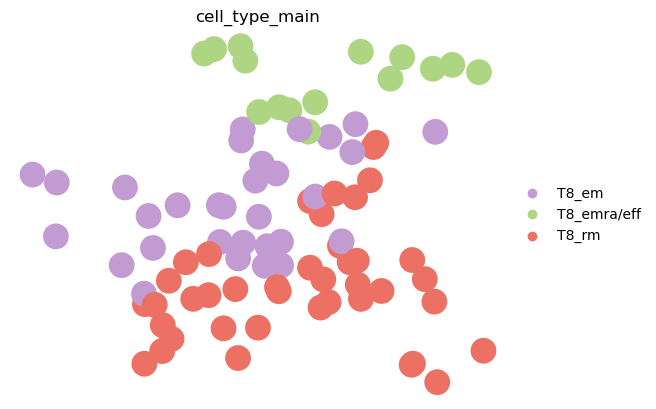

In [2]:
color_T8 = {"T8_em" : "#C39BD3","T8_rm" : "#EC7063","T8_emra/eff" : "#AED581"}

sc.pl.umap(adata, color=['cell_type_main'], frameon=False,palette = color_T8)

In [3]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo', facecolor='white', dpi=100, frameon=False)
cr.settings.verbosity = 2

ldata = sc.read_h5ad('loom.h5ad')

adata = scv.utils.merge(adata, ldata)


scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata,n_jobs = 6)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata,n_jobs = 6)

UnboundLocalError: local variable 'id_length' referenced before assignment

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/zhaoyuean/opt/anaconda3/lib/python3.9/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


saving figure to file ./figures/scvelo_P10_T_7_celltype_30.pdf


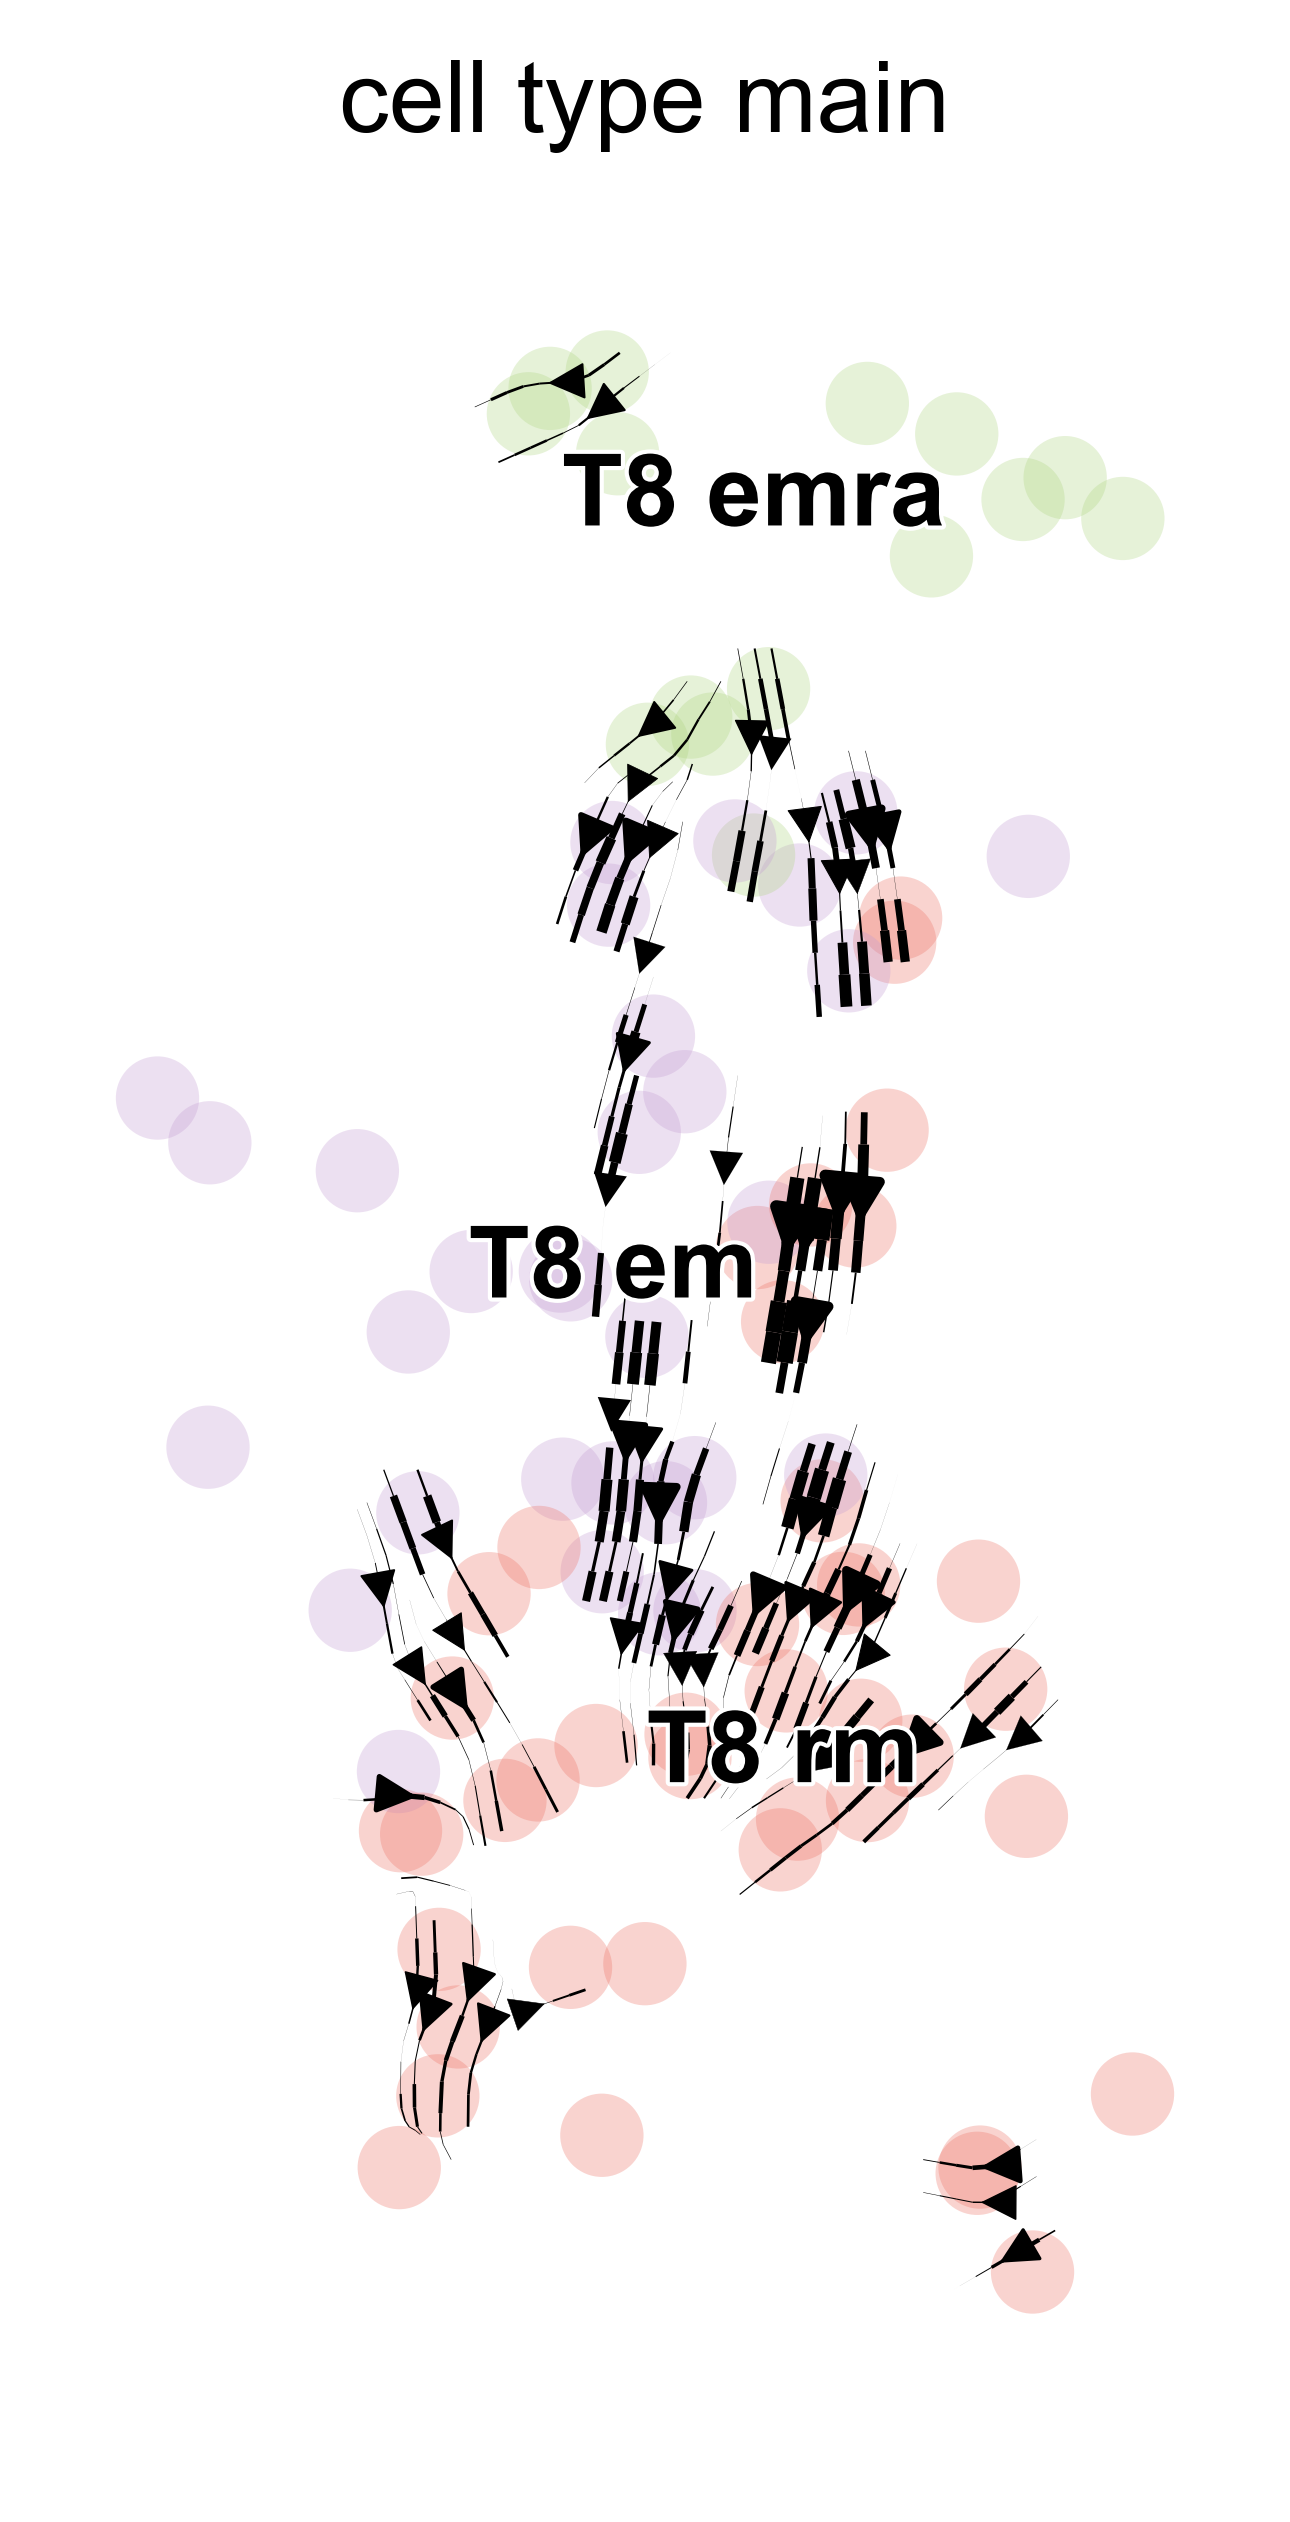

In [4]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['cell_type_main'], 
                                 save='P10_T_7_celltype_30.pdf',dpi = 300, size = 400,palette = color_T8,
                                figsize = (2.5,5), add_margin = 0.1)

saving figure to file ./figures/scvelo_P10_T_7_sampletype_30.pdf


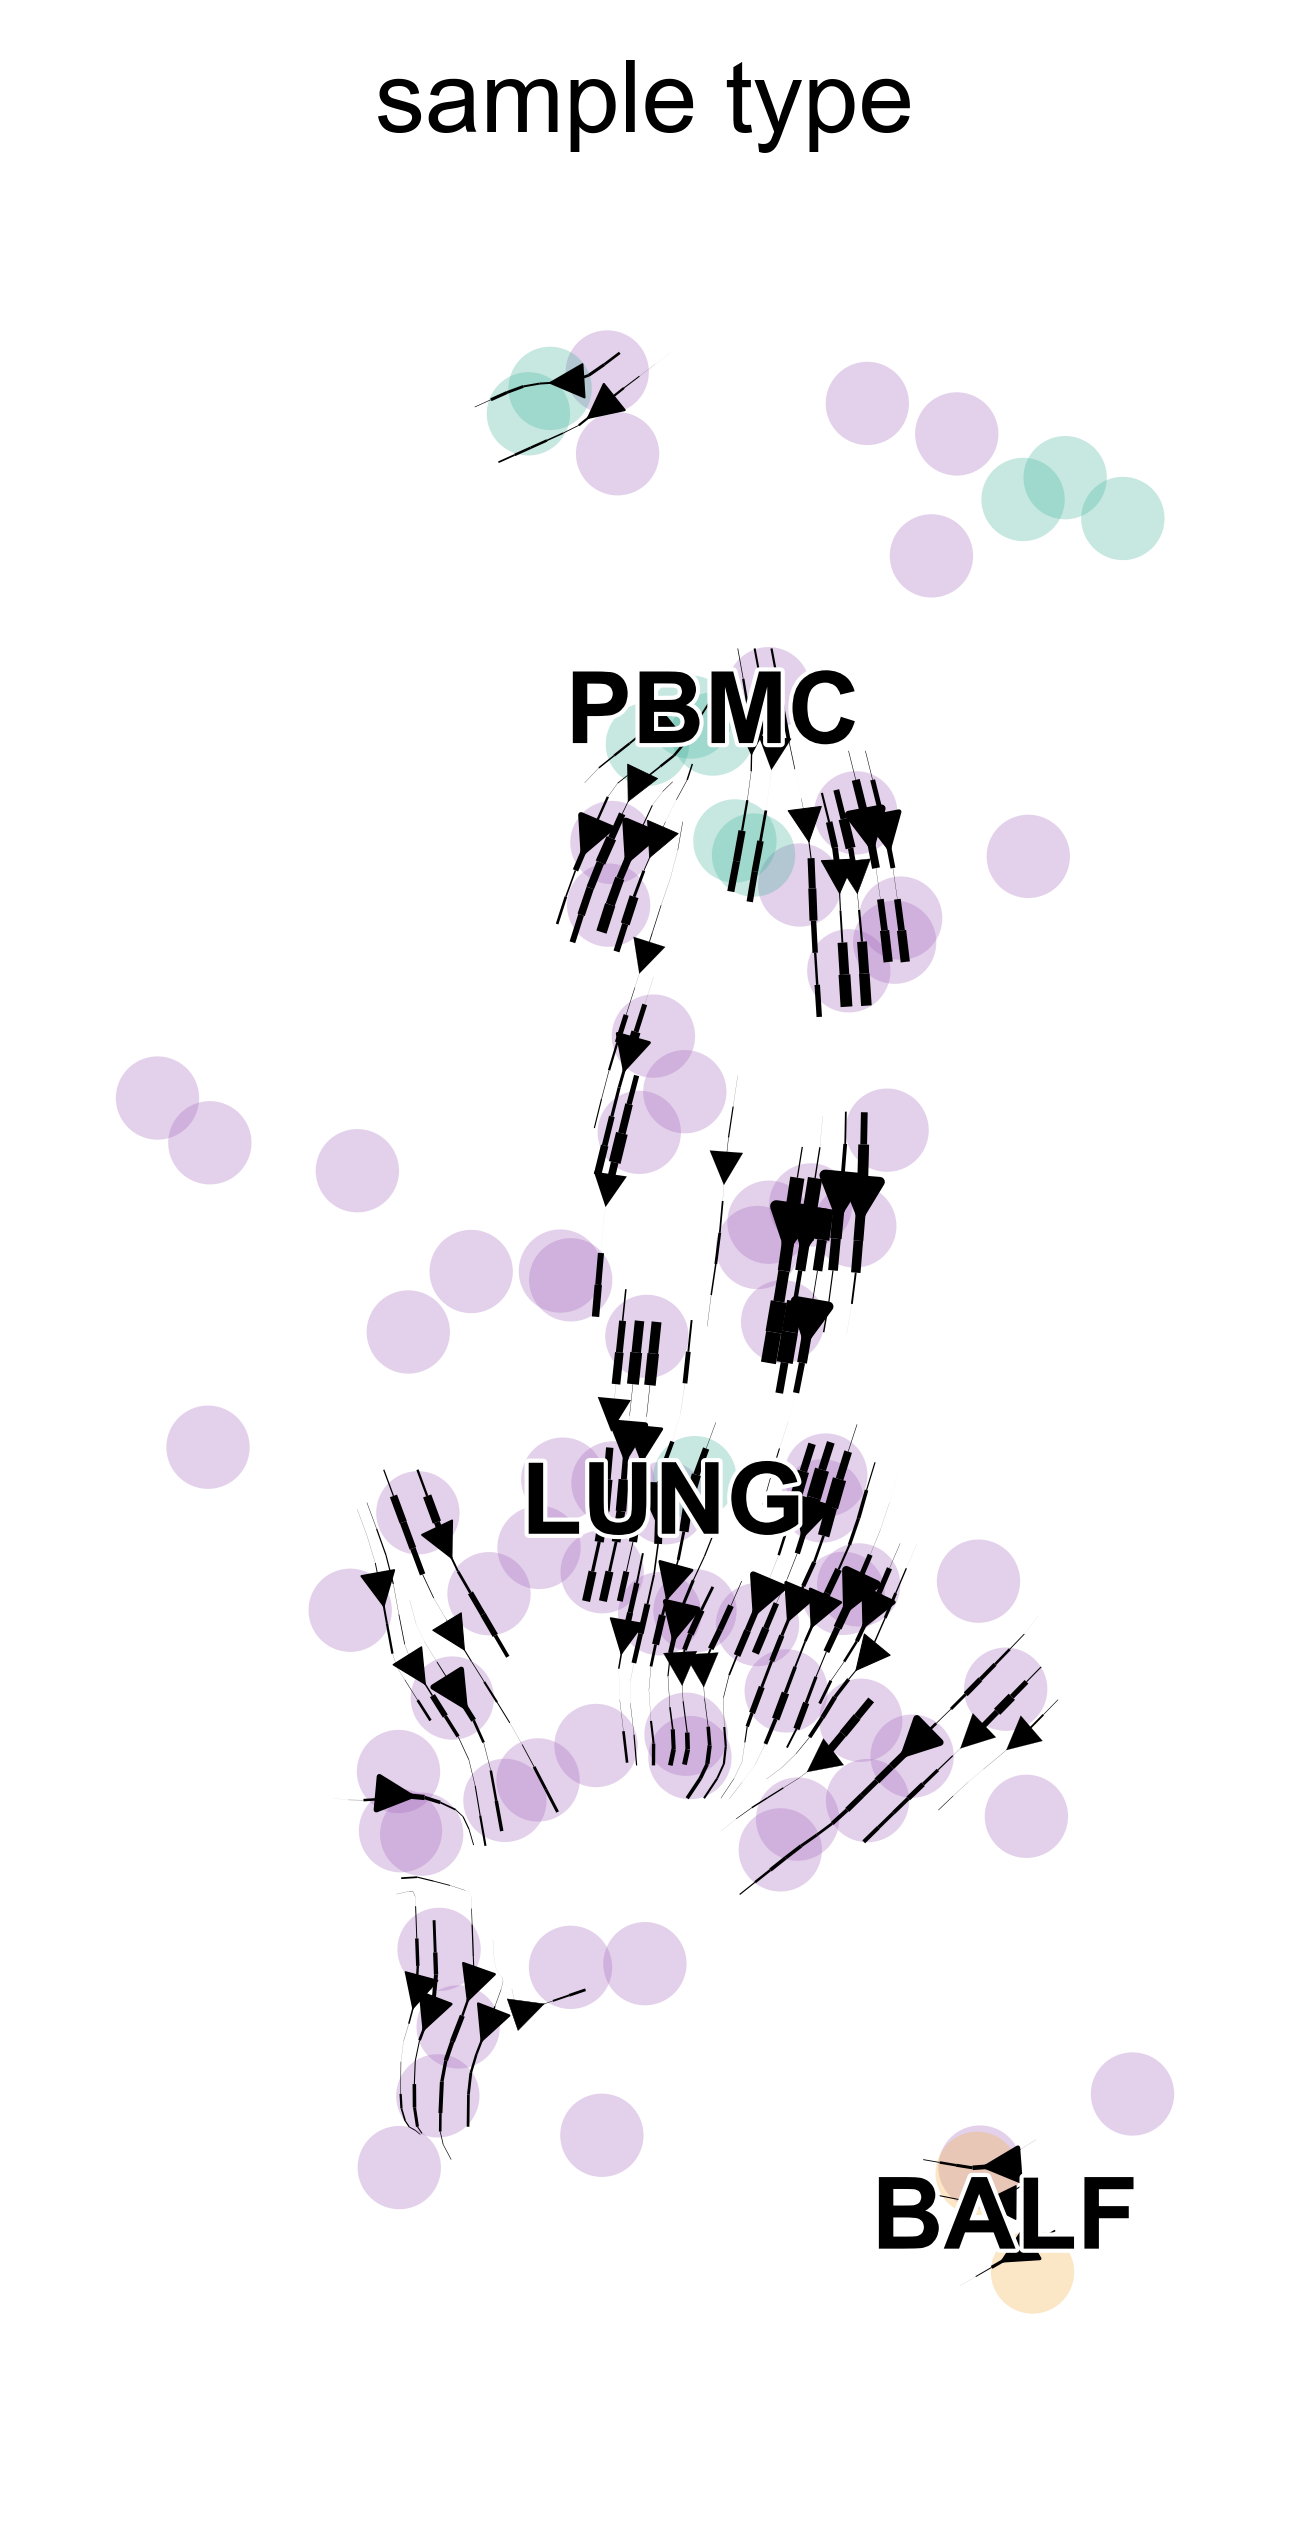

In [7]:
color_sampletype = {"LUNG" : "#A569BD","PBMC" : "#45B39D","BALF" :"#F5B041"}

scv.pl.velocity_embedding_stream(adata, basis='umap', color=['sample_type'], 
                                 save='P10_T_7_sampletype_30.pdf',dpi = 300, size = 400,palette = color_sampletype,
                                figsize = (2.5,5), add_margin = 0.1)


In [6]:
adata.obs.to_csv("P10_T_7_scvelo_metadata_15.csv")

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_P10T7_latenttime.pdf


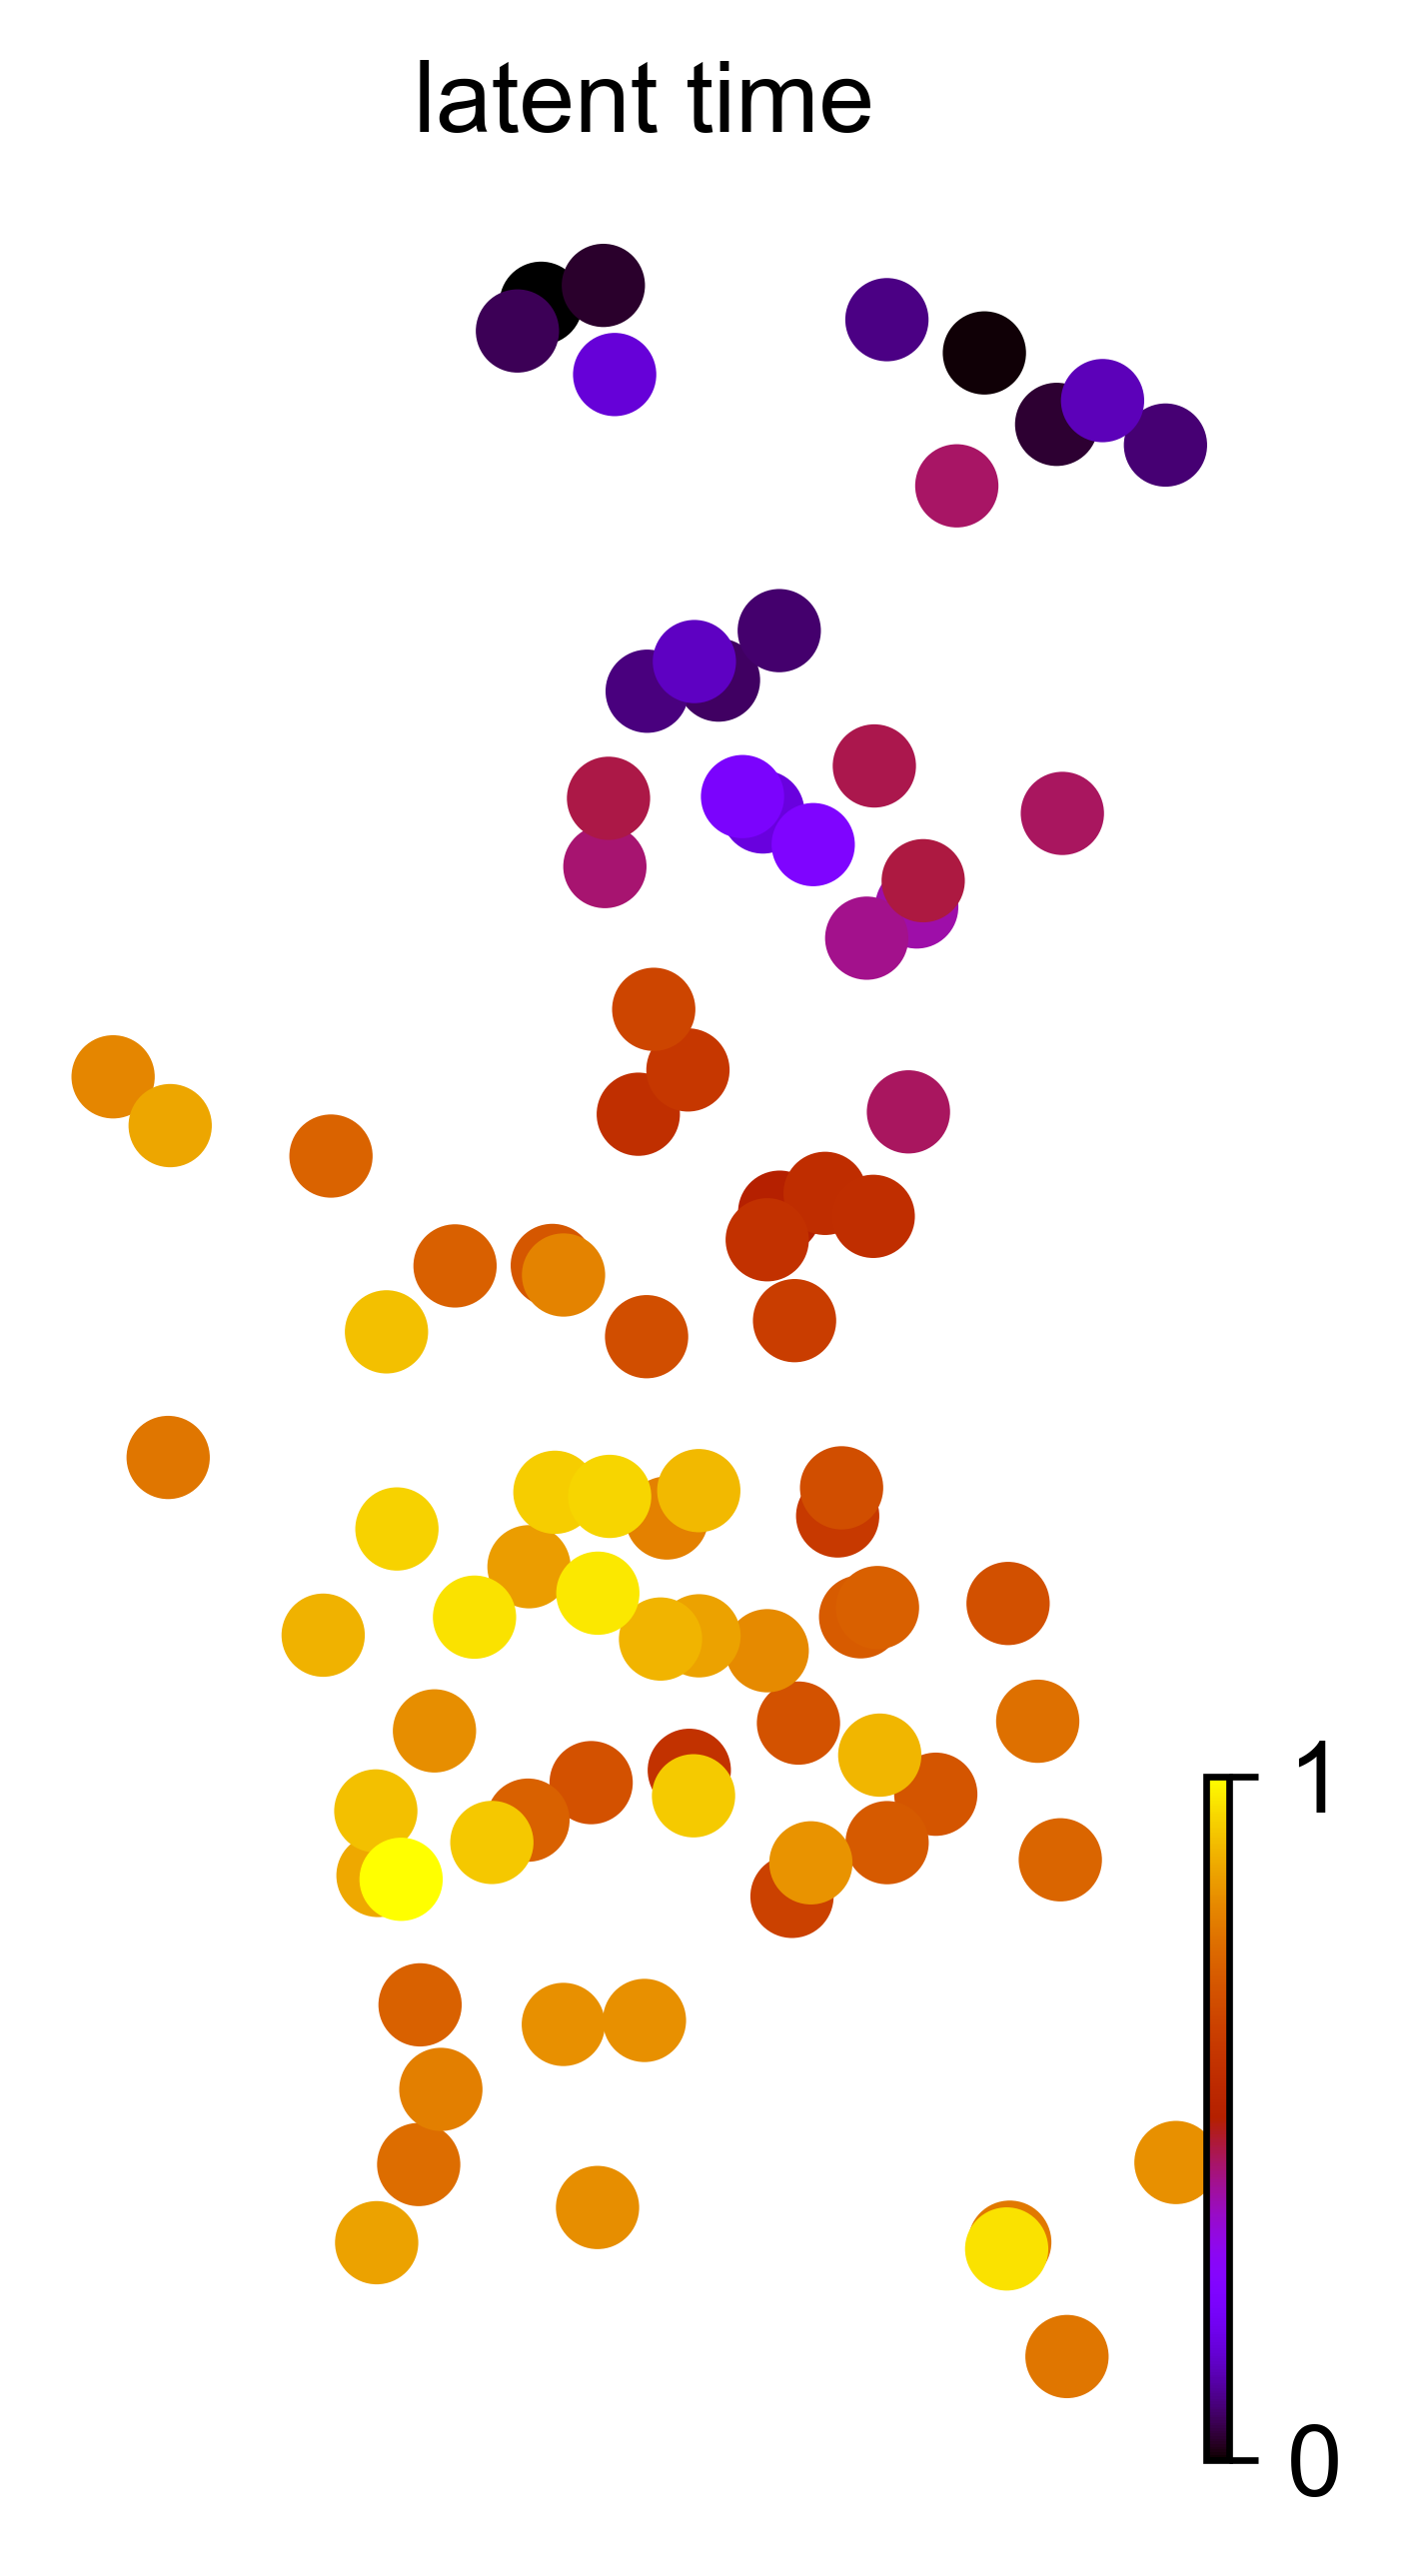

In [8]:
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=400,
               save='P10T7_latenttime.pdf',dpi = 300,figsize = (2.5,5))

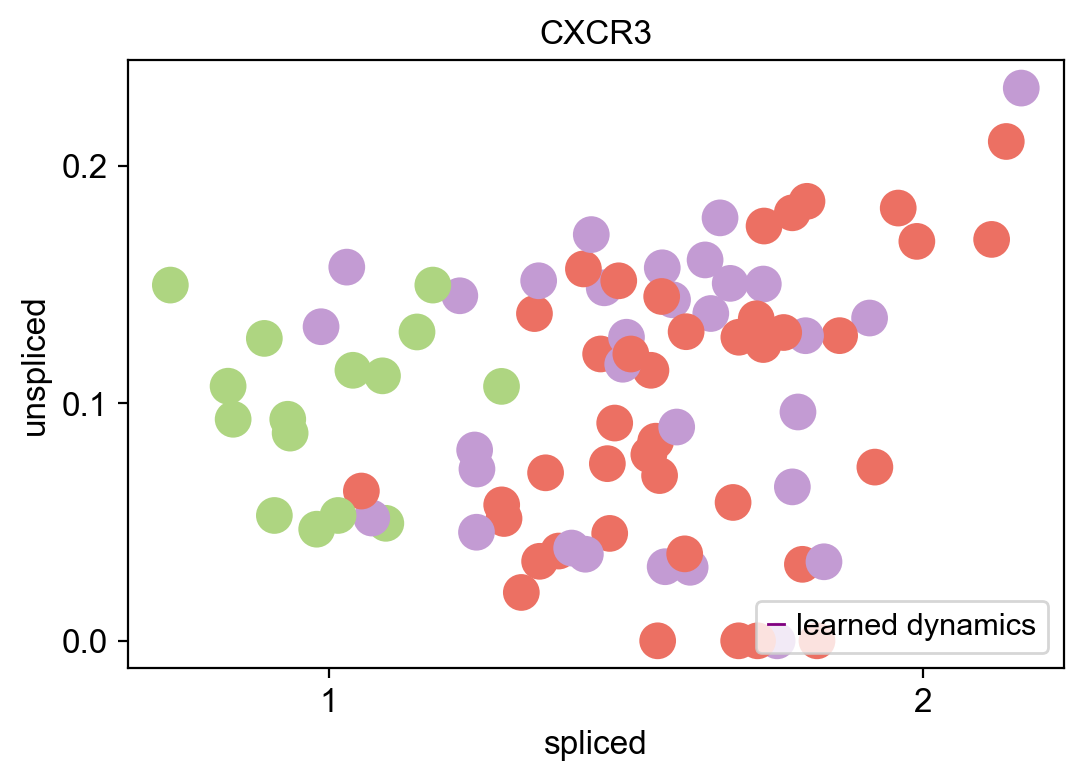

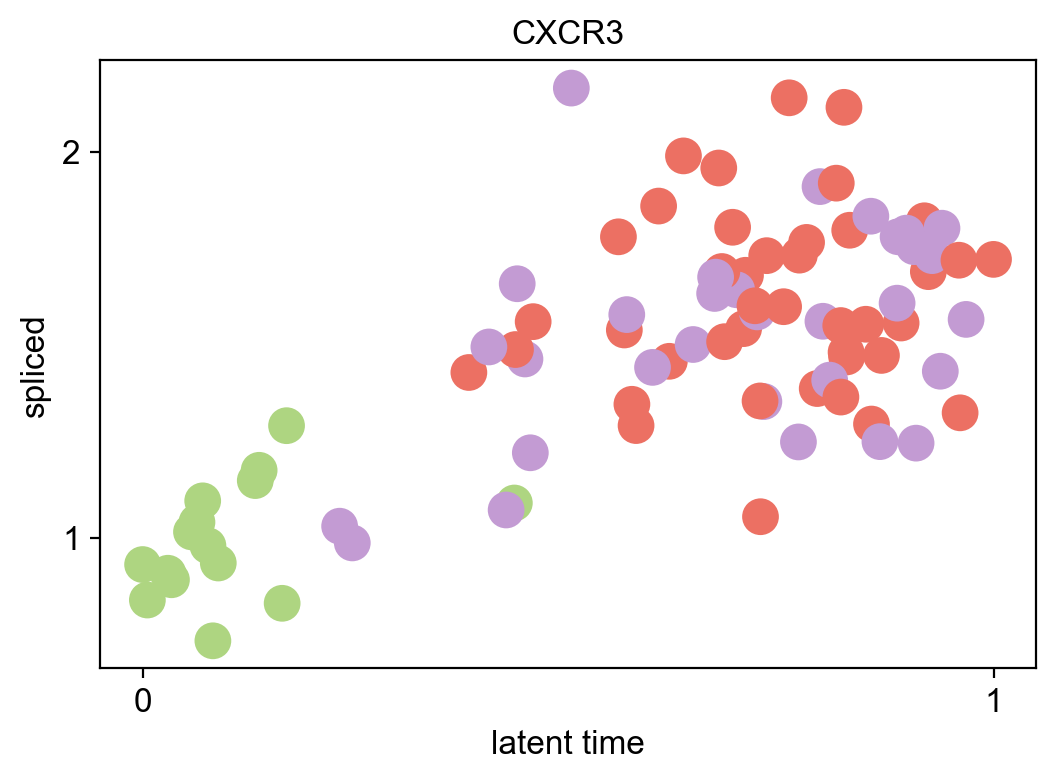

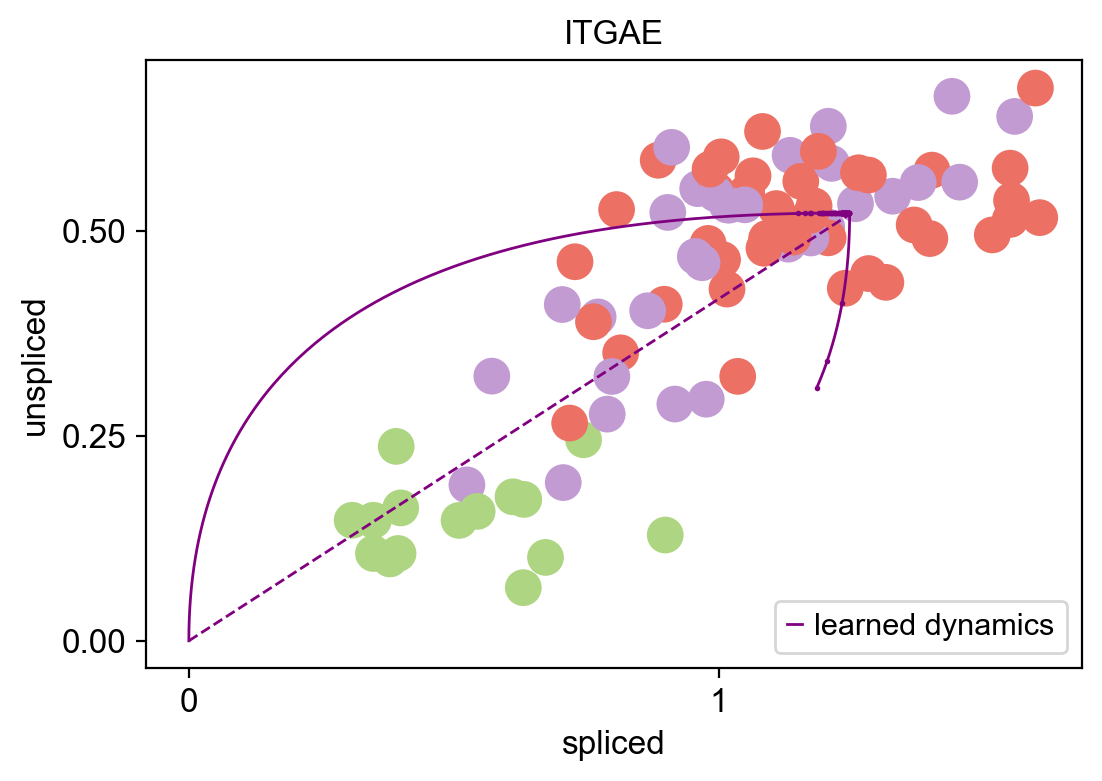

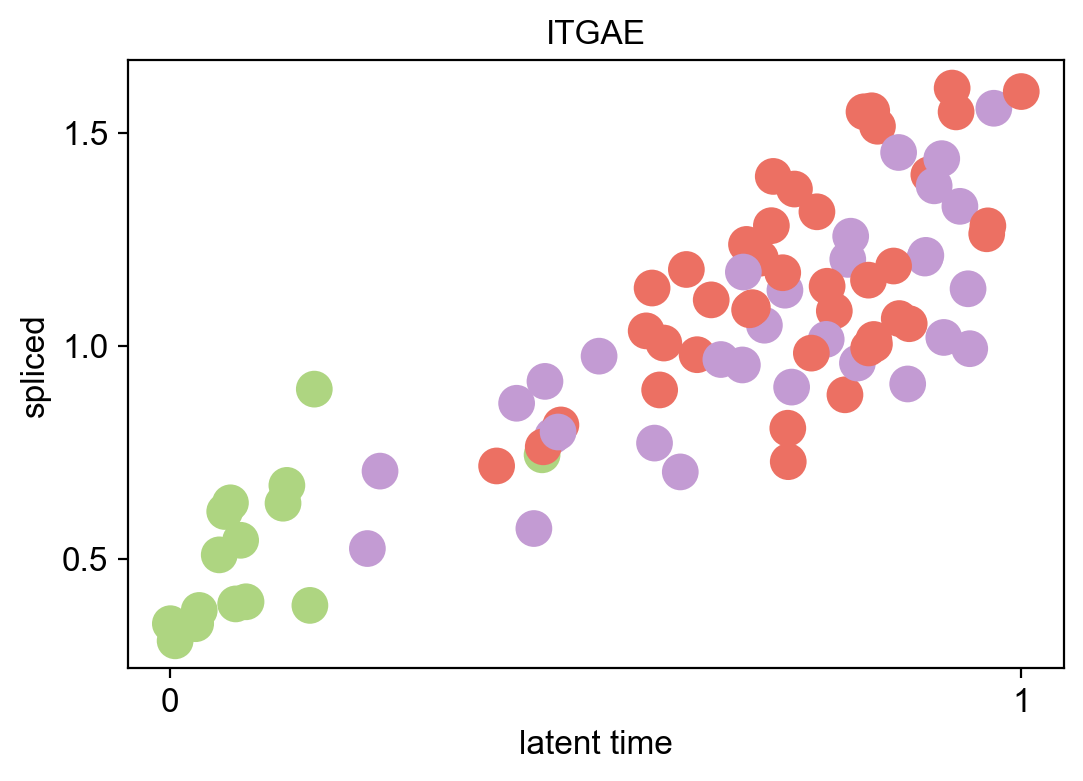